# Notebook Imports

In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler



from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.pipeline import make_pipeline

from sklearn.metrics import (PrecisionRecallDisplay,
                             roc_curve,
                             confusion_matrix,
                             precision_recall_curve, accuracy_score,
                             precision_score, recall_score, f1_score)

# %matplotlib inline

In [2]:
mpl.rcParams['figure.figsize'] = (9, 6)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Reading Data

In [4]:
data_path = '/content/drive/MyDrive/Colab Notebooks/CreditCardFraudDetection'
df = pd.read_csv(data_path + '/creditcard.csv')

# df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Explore Data

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
pd.isnull(df).any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [9]:
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']
print(X.shape)
print(y.value_counts())

(284807, 29)
0    284315
1       492
Name: Class, dtype: int64


In [10]:
y.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [11]:
neg, pos = np.bincount(df['Class'])
total = neg + pos
print(f'Examples:\n    Total: {total}\n    Positive: {pos} ({100 * pos / total:.2f}% of total)\n')

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



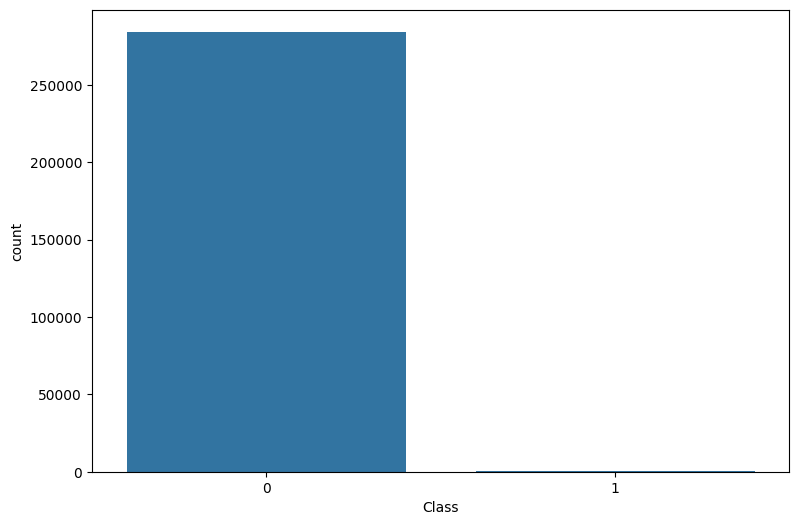

In [12]:
sns.countplot(x=y);

# Training Classifiers with Imbalance Data (Base Models)

In [13]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y,
                                                stratify=y,
                                                test_size=0.2,
                                                random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev,
                                                stratify=y_dev,
                                                test_size=0.2,
                                                random_state=42)
bool_y_train = y_train != 0

print(y_train.value_counts(normalize=True))
print('----------------------------')
print(y_val.value_counts(normalize=True))
print('----------------------------')
print(y_test.value_counts(normalize=True))

0    0.998272
1    0.001728
Name: Class, dtype: float64
----------------------------
0    0.998266
1    0.001734
Name: Class, dtype: float64
----------------------------
0    0.99828
1    0.00172
Name: Class, dtype: float64


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

train_features = np.clip(X_train, -5, 5)
val_features = np.clip(X_val, -5, 5)
test_features = np.clip(X_test, -5, 5)


print('Training labels shape:', y_train.shape)
print('Validation labels shape:', y_val.shape)
print('Test labels shape:', y_test.shape)

print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Test features shape:', X_test.shape)


Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 29)
Validation features shape: (45569, 29)
Test features shape: (56962, 29)


# Look at the data distribution

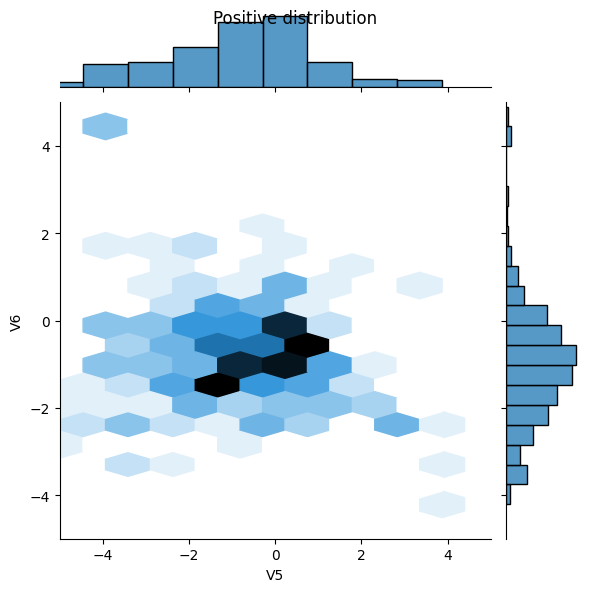

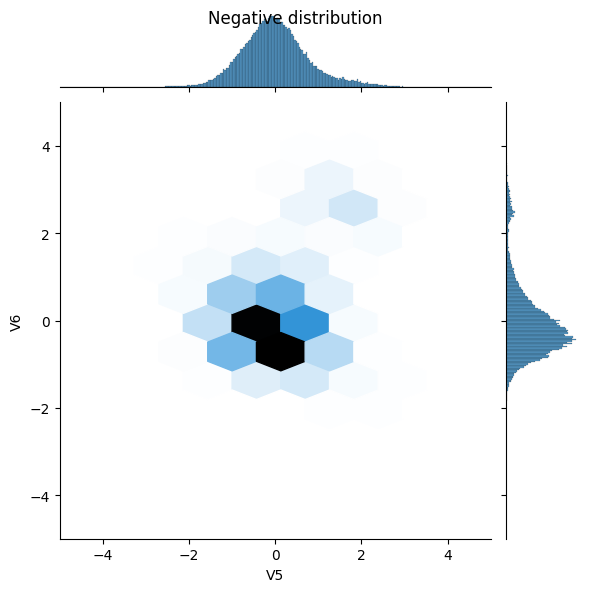

In [15]:
pos_df = pd.DataFrame(X_train[ bool_y_train], columns=df.columns.drop(['Class', 'Time'], ))
neg_df = pd.DataFrame(X_train[~bool_y_train], columns=df.columns.drop(['Class', 'Time'], ))

sns.jointplot(x=pos_df['V5'], y=pos_df['V6'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df['V5'], y=neg_df['V6'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

# Define the model and metrics

In [16]:
METRICS = [
      keras.metrics.BinaryCrossentropy(name='cross entropy'),  # same as model's loss
      keras.metrics.MeanSquaredError(name='Brier score'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[-1],)),
      keras.layers.Dropout(0.5), keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

# Baseline model

## Build the model

In [17]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc',
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [18]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 497 (1.94 KB)
Trainable params: 497 (1.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.predict(X_train[:10])

1/1 [==============================] - 0s 121ms/step


array([[0.26187742],
       [0.404145  ],
       [0.22455375],
       [0.49827337],
       [0.3701669 ],
       [0.34914115],
       [0.14563334],
       [0.46053204],
       [0.32023543],
       [0.31839123]], dtype=float32)

## Optional: Set the correct initial bias.

In [20]:
results = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
print(f"Loss: {results[0]:0.4f}")

Loss: 0.3509


In [21]:
initial_bias = np.log([pos/neg])
initial_bias

array([-6.35935934])

In [22]:
model = make_model(output_bias=initial_bias)
model.predict(X_train[:10])

1/1 [==============================] - 0s 50ms/step


array([[0.00180875],
       [0.00231374],
       [0.00113327],
       [0.00299154],
       [0.00055053],
       [0.00223179],
       [0.00096874],
       [0.00025003],
       [0.00078288],
       [0.00060668]], dtype=float32)

In [23]:
results = model.evaluate(X_train, y_train, batch_size=BATCH_SIZE, verbose=0)
print(f"Loss: {results[0]:0.4f}")

Loss: 0.0192


## Checkpoint the initial weights

In [24]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

## Confirm that the bias fix helps

In [25]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_val, y_val),
    verbose=0)

In [26]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_val, y_val),
    verbose=0)

In [27]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

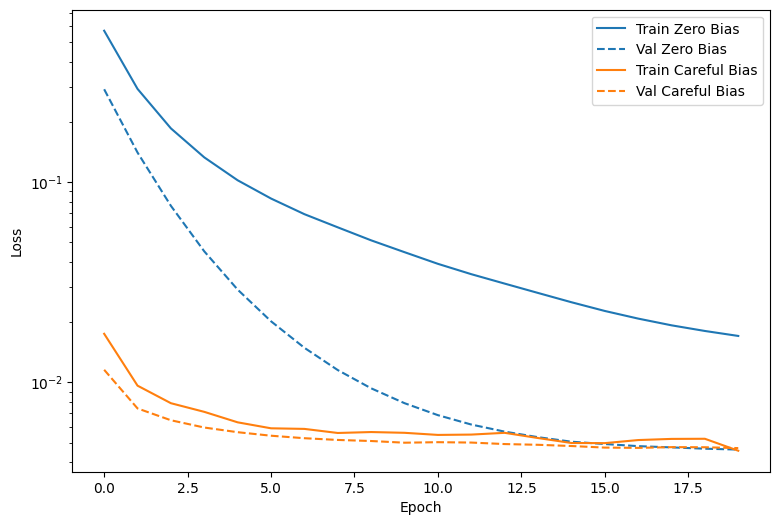

In [28]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

## Train the model

In [29]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val, y_val))

Epoch 1/100
90/90 [==============================] - 3s 12ms/step - loss: 0.0173 - cross entropy: 0.0148 - Brier score: 0.0020 - tp: 45.0000 - fp: 121.0000 - tn: 227330.0000 - fn: 349.0000 - accuracy: 0.9979 - precision: 0.2711 - recall: 0.1142 - auc: 0.6096 - prc: 0.0597 - val_loss: 0.0118 - val_cross entropy: 0.0118 - val_Brier score: 0.0018 - val_tp: 0.0000e+00 - val_fp: 6.0000 - val_tn: 45484.0000 - val_fn: 79.0000 - val_accuracy: 0.9981 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6295 - val_prc: 0.0235
Epoch 2/100
90/90 [==============================] - 0s 5ms/step - loss: 0.0100 - cross entropy: 0.0100 - Brier score: 0.0016 - tp: 44.0000 - fp: 44.0000 - tn: 181917.0000 - fn: 271.0000 - accuracy: 0.9983 - precision: 0.5000 - recall: 0.1397 - auc: 0.7951 - prc: 0.1712 - val_loss: 0.0075 - val_cross entropy: 0.0075 - val_Brier score: 0.0013 - val_tp: 14.0000 - val_fp: 3.0000 - val_tn: 45487.0000 - val_fn: 65.0000 - val_accuracy: 0.9985 - val_precision: 0.8235 

## Check training history

In [30]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

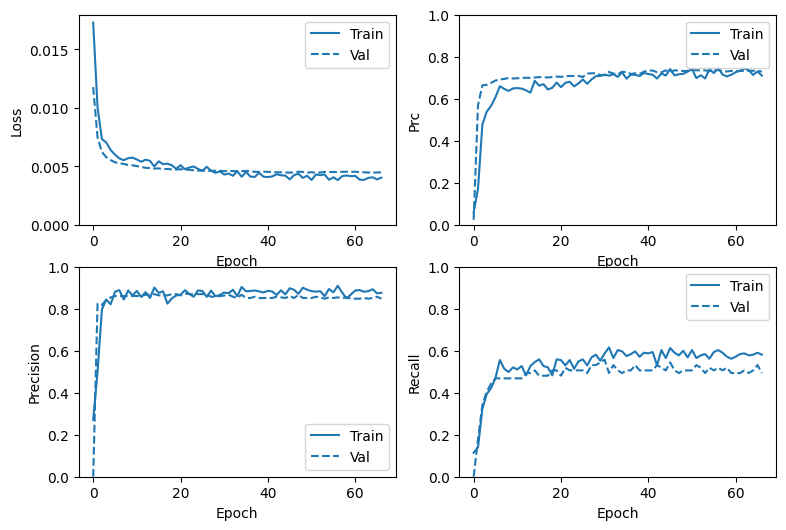

In [31]:
plot_metrics(baseline_history)

## Evaluate metrics

In [32]:
train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

28/28 [==============================] - 0s 3ms/step


In [33]:
def plot_cm(labels, predictions, threshold=0.5):
  cm = confusion_matrix(labels, predictions > threshold)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(threshold))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.0039012315683066845
cross entropy :  0.0039012315683066845
Brier score :  0.0006610322743654251
tp :  62.0
fp :  12.0
tn :  56852.0
fn :  36.0
accuracy :  0.9991573095321655
precision :  0.837837815284729
recall :  0.6326530575752258
auc :  0.9434382319450378
prc :  0.7311630845069885

Legitimate Transactions Detected (True Negatives):  56852
Legitimate Transactions Incorrectly Detected (False Positives):  12
Fraudulent Transactions Missed (False Negatives):  36
Fraudulent Transactions Detected (True Positives):  62
Total Fraudulent Transactions:  98


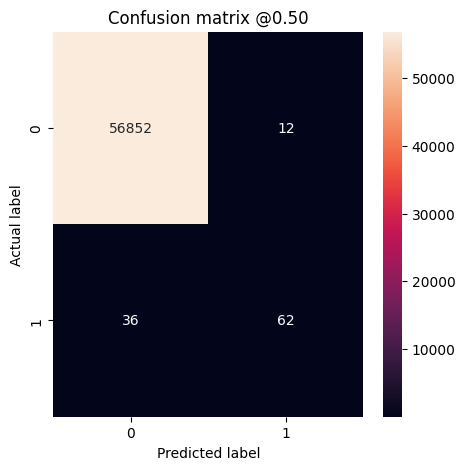

In [34]:
baseline_results = model.evaluate(X_test, y_test,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_baseline)

## Changing the threshold

Legitimate Transactions Detected (True Negatives):  56839
Legitimate Transactions Incorrectly Detected (False Positives):  25
Fraudulent Transactions Missed (False Negatives):  16
Fraudulent Transactions Detected (True Positives):  82
Total Fraudulent Transactions:  98
Legitimate Transactions Detected (True Negatives):  56744
Legitimate Transactions Incorrectly Detected (False Positives):  120
Fraudulent Transactions Missed (False Negatives):  12
Fraudulent Transactions Detected (True Positives):  86
Total Fraudulent Transactions:  98


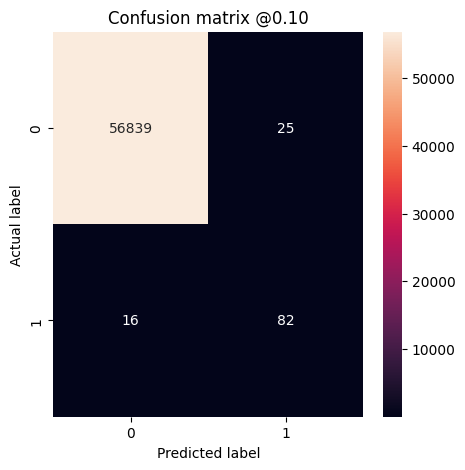

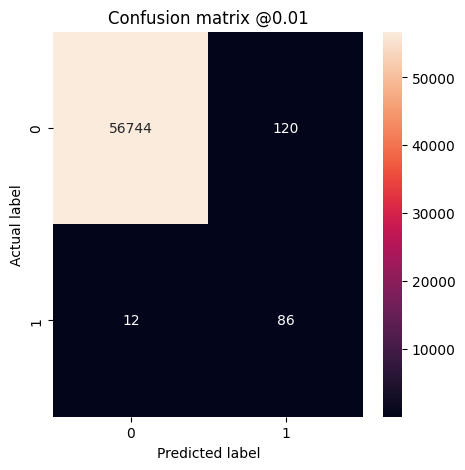

In [35]:
plot_cm(y_test, test_predictions_baseline, threshold=0.1)
plot_cm(y_test, test_predictions_baseline, threshold=0.01)

## Plot the ROC

In [36]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

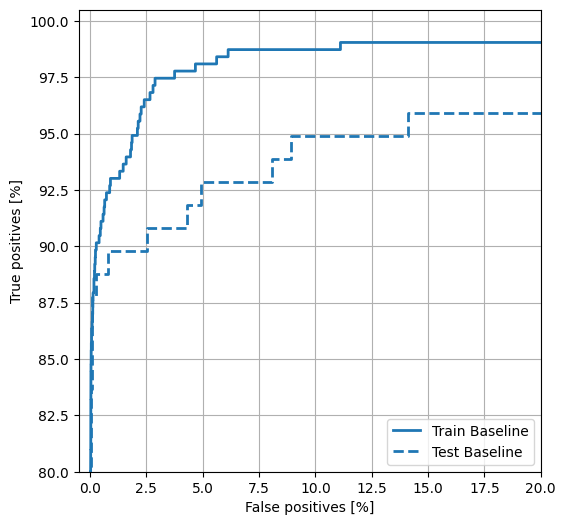

In [37]:
plot_roc("Train Baseline", y_train, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", y_test, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');

## Plot the PRC

In [38]:
def plot_prc(name, labels, predictions, **kwargs):
    precision, recall, _ = precision_recall_curve(labels, predictions)

    plt.plot(precision, recall, label=name, linewidth=2, **kwargs)
    plt.xlabel('Precision')
    plt.ylabel('Recall')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

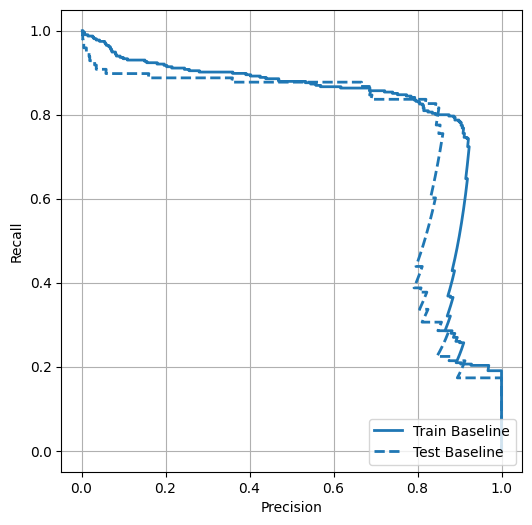

In [39]:
plot_prc("Train Baseline", y_train, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", y_test, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');

# Class weight

## Calculate class weights

In [40]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f'Weight for class 0: {weight_for_0:.2f}')
print('Weight for class 1: {weight_for_1:.2f}')

Weight for class 0: 0.50
Weight for class 1: {weight_for_1:.2f}


## Train a model with class weights

In [41]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_val, y_val),
    # The class weights go here
    class_weight=class_weight)

Epoch 1/100
90/90 [==============================] - 3s 12ms/step - loss: 3.1761 - cross entropy: 0.0187 - Brier score: 0.0026 - tp: 78.0000 - fp: 343.0000 - tn: 238482.0000 - fn: 335.0000 - accuracy: 0.9972 - precision: 0.1853 - recall: 0.1889 - auc: 0.6797 - prc: 0.0668 - val_loss: 0.0146 - val_cross entropy: 0.0146 - val_Brier score: 0.0023 - val_tp: 4.0000 - val_fp: 41.0000 - val_tn: 45449.0000 - val_fn: 75.0000 - val_accuracy: 0.9975 - val_precision: 0.0889 - val_recall: 0.0506 - val_auc: 0.8035 - val_prc: 0.0413
Epoch 2/100
90/90 [==============================] - 1s 6ms/step - loss: 1.3758 - cross entropy: 0.0258 - Brier score: 0.0041 - tp: 110.0000 - fp: 631.0000 - tn: 181330.0000 - fn: 205.0000 - accuracy: 0.9954 - precision: 0.1484 - recall: 0.3492 - auc: 0.8492 - prc: 0.0990 - val_loss: 0.0161 - val_cross entropy: 0.0161 - val_Brier score: 0.0022 - val_tp: 35.0000 - val_fp: 68.0000 - val_tn: 45422.0000 - val_fn: 44.0000 - val_accuracy: 0.9975 - val_precision: 0.3398 - val_re

## Check training history

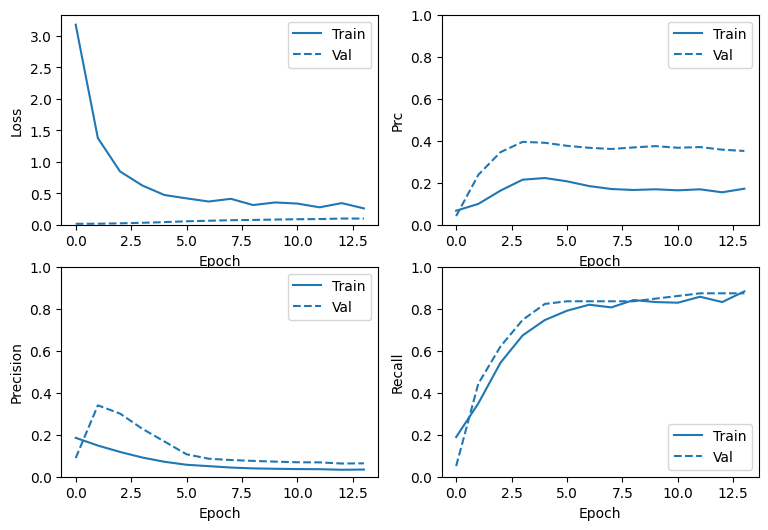

In [42]:
plot_metrics(weighted_history)

## Evaluate metrics

In [43]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

28/28 [==============================] - 0s 2ms/step


loss :  0.03398142755031586
cross entropy :  0.03398142755031586
Brier score :  0.004918604623526335
tp :  81.0
fp :  279.0
tn :  56585.0
fn :  17.0
accuracy :  0.9948035478591919
precision :  0.22499999403953552
recall :  0.8265306353569031
auc :  0.9636887311935425
prc :  0.40841078758239746

Legitimate Transactions Detected (True Negatives):  56689
Legitimate Transactions Incorrectly Detected (False Positives):  175
Fraudulent Transactions Missed (False Negatives):  17
Fraudulent Transactions Detected (True Positives):  81
Total Fraudulent Transactions:  98


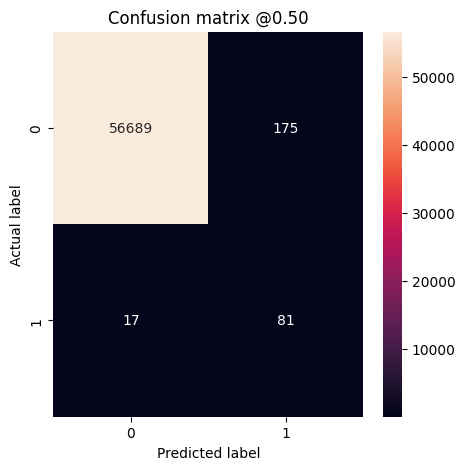

In [44]:
weighted_results = weighted_model.evaluate(X_test, y_test,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_weighted)

## Plot the ROC

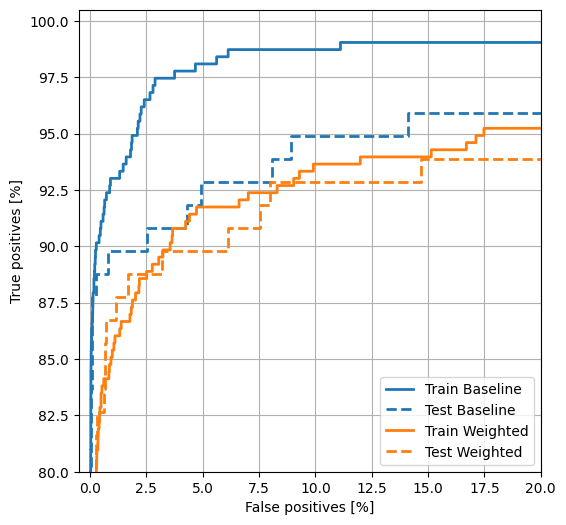

In [45]:
plot_roc("Train Baseline", y_train, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", y_test, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", y_train, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", y_test, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right');

## Plot the PRC

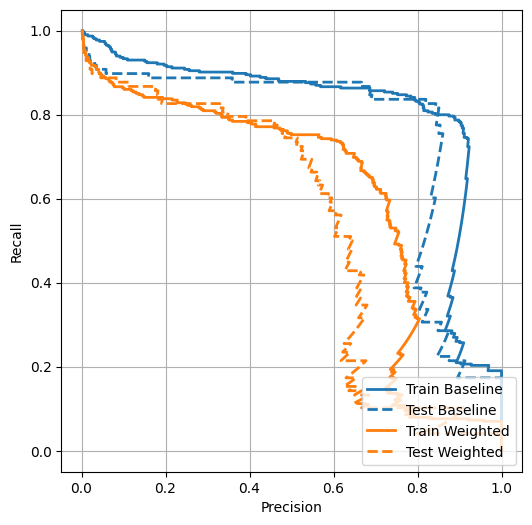

In [46]:
plot_prc("Train Baseline", y_train, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", y_test, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", y_train, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", y_test, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right');

# Oversampling

In [47]:
ros = RandomOverSampler()
X_train_oversample, y_train_oversample = ros.fit_resample(X_train, y_train)
print(X_train.shape)
print(X_train_oversample.shape)
y_train_oversample.value_counts()

(182276, 29)
(363922, 29)


0    181961
1    181961
Name: Class, dtype: int64

In [48]:
SHUFFLE_BUFFER_SIZE = 100000
train_ros_ds = tf.data.Dataset.from_tensor_slices((X_train_oversample, y_train_oversample)).cache()
train_ros_ds = train_ros_ds.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)


val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).cache().batch(BATCH_SIZE).prefetch(2)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).cache().batch(BATCH_SIZE).prefetch(2)

In [53]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

278.0

## Train on the oversampled data

In [55]:
oversampled_model = make_model()
oversampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = oversampled_model.layers[-1]
output_layer.bias.assign([0])

oversampled_history = oversampled_model.fit(
    train_ros_ds,
    epochs=EPOCHS,
    # steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
178/178 [==============================] - 4s 13ms/step - loss: 0.5200 - cross entropy: 0.4722 - Brier score: 0.1493 - tp: 145480.0000 - fp: 58858.0000 - tn: 168593.0000 - fn: 36560.0000 - accuracy: 0.7670 - precision: 0.7120 - recall: 0.7992 - auc: 0.8747 - prc: 0.8848 - val_loss: 0.5043 - val_cross entropy: 0.5043 - val_Brier score: 0.1591 - val_tp: 70.0000 - val_fp: 8549.0000 - val_tn: 36941.0000 - val_fn: 9.0000 - val_accuracy: 0.8122 - val_precision: 0.0081 - val_recall: 0.8861 - val_auc: 0.9350 - val_prc: 0.3109
Epoch 2/100
178/178 [==============================] - 2s 9ms/step - loss: 0.3063 - cross entropy: 0.3063 - Brier score: 0.0967 - tp: 160511.0000 - fp: 30871.0000 - tn: 151090.0000 - fn: 21450.0000 - accuracy: 0.8562 - precision: 0.8387 - recall: 0.8821 - auc: 0.9492 - prc: 0.9592 - val_loss: 0.3033 - val_cross entropy: 0.3033 - val_Brier score: 0.0817 - val_tp: 70.0000 - val_fp: 3650.0000 - val_tn: 41840.0000 - val_fn: 9.0000 - val_accuracy: 0.9197 - val_prec

## Check training history

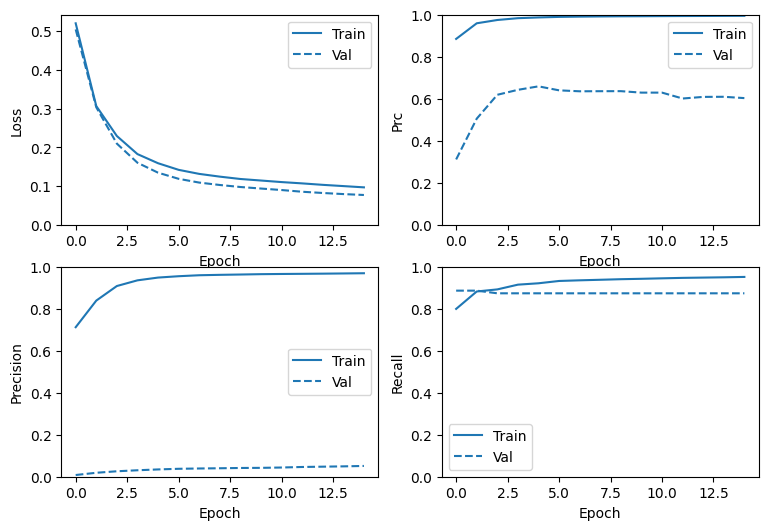

In [56]:
plot_metrics(oversampled_history)

## Re-train

In [59]:
oversampled_model = make_model()
oversampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = oversampled_model.layers[-1]
output_layer.bias.assign([0])

oversampled_history = oversampled_model.fit(
    train_ros_ds,
    # These are not real epochs
    # steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
178/178 [==============================] - 13s 47ms/step - loss: 0.5220 - cross entropy: 0.5199 - Brier score: 0.1646 - tp: 145227.0000 - fp: 65772.0000 - tn: 161679.0000 - fn: 36813.0000 - accuracy: 0.7495 - precision: 0.6883 - recall: 0.7978 - auc: 0.8536 - prc: 0.8749 - val_loss: 0.5071 - val_cross entropy: 0.5071 - val_Brier score: 0.1602 - val_tp: 70.0000 - val_fp: 8614.0000 - val_tn: 36876.0000 - val_fn: 9.0000 - val_accuracy: 0.8108 - val_precision: 0.0081 - val_recall: 0.8861 - val_auc: 0.9362 - val_prc: 0.3078
Epoch 2/1000
178/178 [==============================] - 4s 18ms/step - loss: 0.3062 - cross entropy: 0.3062 - Brier score: 0.0966 - tp: 160713.0000 - fp: 31020.0000 - tn: 150941.0000 - fn: 21248.0000 - accuracy: 0.8564 - precision: 0.8382 - recall: 0.8832 - auc: 0.9495 - prc: 0.9593 - val_loss: 0.3031 - val_cross entropy: 0.3031 - val_Brier score: 0.0818 - val_tp: 70.0000 - val_fp: 3642.0000 - val_tn: 41848.0000 - val_fn: 9.0000 - val_accuracy: 0.9199 - val_

## Re-check training history

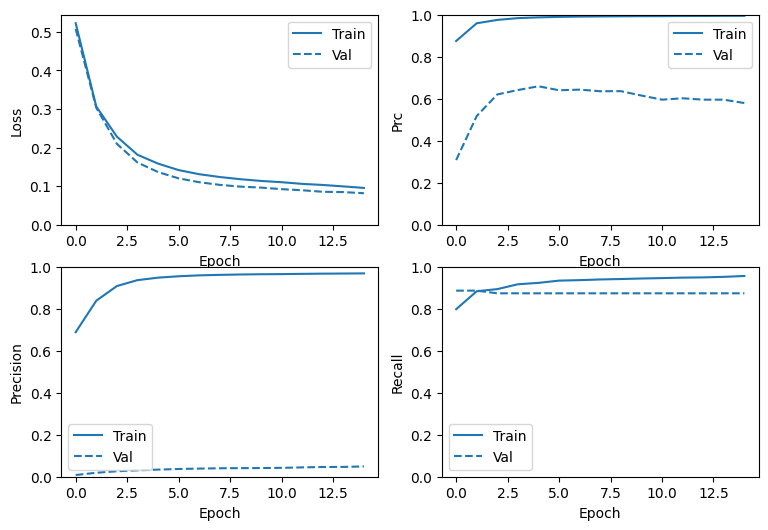

In [60]:
plot_metrics(oversampled_history)

## Evaluate metrics

In [61]:
train_predictions_oversampled = oversampled_model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_oversampled = oversampled_model.predict(X_test, batch_size=BATCH_SIZE)

28/28 [==============================] - 0s 5ms/step


loss :  0.14017854630947113
cross entropy :  0.14017854630947113
Brier score :  0.03538939356803894
tp :  90.0
fp :  2525.0
tn :  54339.0
fn :  8.0
accuracy :  0.9555317759513855
precision :  0.03441682457923889
recall :  0.918367326259613
auc :  0.9699604511260986
prc :  0.6287007331848145

Legitimate Transactions Detected (True Negatives):  54339
Legitimate Transactions Incorrectly Detected (False Positives):  2525
Fraudulent Transactions Missed (False Negatives):  8
Fraudulent Transactions Detected (True Positives):  90
Total Fraudulent Transactions:  98


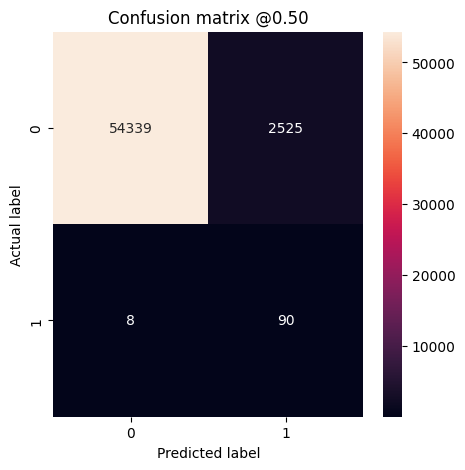

In [62]:
oversampled_results = oversampled_model.evaluate(X_test, y_test,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(oversampled_model.metrics_names, oversampled_results):
  print(name, ': ', value)
print()
plot_cm(y_test, test_predictions_oversampled)

## Plot the ROC

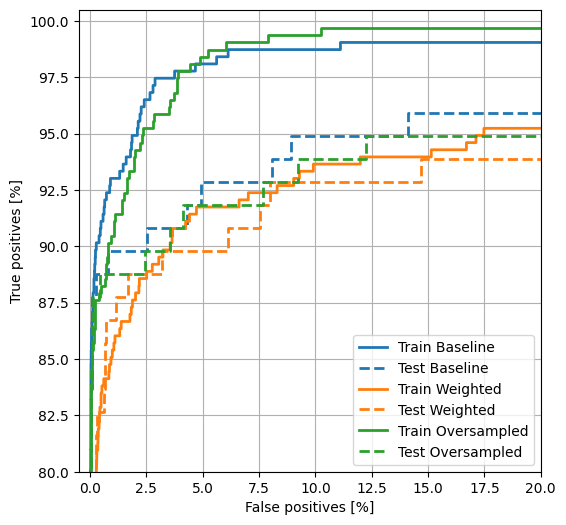

In [63]:
plot_roc("Train Baseline", y_train, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", y_test, test_predictions_baseline, color=colors[0], linestyle='--')
plot_roc("Train Weighted", y_train, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", y_test, test_predictions_weighted, color=colors[1], linestyle='--')
plot_roc("Train Oversampled", y_train, train_predictions_oversampled, color=colors[2])
plot_roc("Test Oversampled", y_test, test_predictions_oversampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right');

## Plot the AUPRC

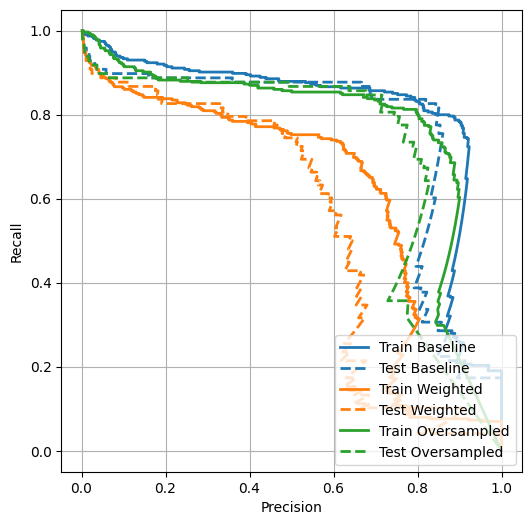

In [64]:
plot_prc("Train Baseline", y_train, train_predictions_baseline, color=colors[0])
plot_prc("Test Baseline", y_test, test_predictions_baseline, color=colors[0], linestyle='--')

plot_prc("Train Weighted", y_train, train_predictions_weighted, color=colors[1])
plot_prc("Test Weighted", y_test, test_predictions_weighted, color=colors[1], linestyle='--')

plot_prc("Train Oversampled", y_train, train_predictions_oversampled, color=colors[2])
plot_prc("Test Oversampled", y_test, test_predictions_oversampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right');